## INTRODUÇÃO E IMPORTANDO OS DADOS

### INTRODUÇÃO E OBJETIVOS

 Este projeto  visa buscar esclarecer porque alguns clientes estão deixando de usar os serviços do banco Beta Bank, bom como criar um modelo que busca prever se um cliente deixará o banco, utilizando-se os dados de comportamento dos mesmos.  
Sendi assim faz-se necessário construir um modelo buscando um sólido valor de F1 e compará-lo com outra métricas, como AUC-ROC. Após isto iremos avaliar quais hiperparâmetros podem ser ajustados para se obter as melhores métricas com o modelo de treinamento mais adequado para esta tarefa.    
 


### IMPORTAÇÃO E PRÉ-ANALISE DOS DADOS

In [1]:
import pandas as pd 
import scipy.stats  as spt 
import seaborn as sns
import matplotlib as mplt
import matplotlib.pyplot as plt
import seaborn as sns
import  plotly.express as px
import pandas as pd
import numpy as np
from sklearn.utils import shuffle
from sklearn.metrics import roc_auc_score 
from sklearn.metrics import roc_curve 
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler 
from sklearn.metrics import f1_score 
from sklearn.metrics import confusion_matrix



In [2]:
df= pd.read_csv('/datasets/Churn.csv')

In [3]:
df.head(5)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2.0,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1.0,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8.0,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1.0,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2.0,125510.82,1,1,1,79084.10,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           9091 non-null   float64
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(3), int64(8), object(3)
memory usage: 1.1+ MB


In [5]:
df.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,9091.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,4.997690,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.894723,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,2.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


  *   O dataset traz uma quantidade considerável de colunas, algumas delas sendo variáveis categóricas e outras numéricas.
  * Existe também colunas com dados booleanos (0 e 1) que poderá ser utilizado no treinamento do modelo como target. 
 

In [6]:
df.isnull().sum()


RowNumber            0
CustomerId           0
Surname              0
CreditScore          0
Geography            0
Gender               0
Age                  0
Tenure             909
Balance              0
NumOfProducts        0
HasCrCard            0
IsActiveMember       0
EstimatedSalary      0
Exited               0
dtype: int64

  * Apenas Tenure tem dados Nan; se trata de uma quantidade pouco expresiva do dataset <1% dos valores totais.


    - Como se trata de um número pequeno de dados Nan, vamos substituí-los pela mediana dos demais valores:
   

In [7]:
df.duplicated().sum()


0

In [8]:
df_null=df[df['Tenure'].isnull()]

In [9]:
df['Tenure'] = df['Tenure'].fillna(value=df['Tenure'].median())

In [10]:
df['Tenure'].isnull().sum()


0

### Aplicar filtragem e transformação nos dados

    Como as colunas são de categorias diferentes, podemos fazer uma transformação nos dados.
    Primeiro é necessário que os dados que serão transformados, sejam salvos em uma tabela separada.  

  *  A primeira transformação será nos dados categóricos, que precisam ser convertidos para numéricos.

In [11]:
var_non_informative = ['RowNumber', 'CustomerId', 'Surname']
var_numeric = ['CreditScore', 'Age', 'Tenure', 'Balance', 
               'NumOfProducts', 'HasCrCard', 'IsActiveMember', 
               'EstimatedSalary']
var_categorical2 = ['Geography', 'Gender']


A primeira transformação será nos dados categóricos, que precisam ser convertidos para numéricos.

#### Removendo as colunas que não serão utilizadas:

 * Inicialmente vamos remover a coluna que não tem relevância para o treinamento do nosso modelo. 

In [12]:
df.drop(var_non_informative, axis=1, inplace=True)

 * Depois vamos extrair variáveis numéricas das colunas que estão como categóricas. 

In [13]:
df = pd.get_dummies(df, drop_first=True, columns=var_categorical2)

## Exame do equilíbrio das classes e  treinamento do modelo

### Treinamento do modelo

     O objetivo do modelo aqui será definido como a coluna 'Exited' que traz informações sobre a evasão dos clientes (1 - sim; 0 - não).


#### Definindo a váriaveis target e feature

Vamos definir a variável Target como sendo a coluna ['Exited'] que traz informações sobre a evasão dos clientes (1 - sim; 0 - não), afim de encontrar padrões no comportamento dos clientes procurando padrões nas demais colunas relevantes que serão utilizadas como features.

* Tamanho conjunto de teste: 
    Já que estaremos lidando com um problema relativamente complexo precisamos term um conjunto de teste e validação com tamanho razoável. Por isso vamos utilizar 20% dos dados para os conjuntos.

In [14]:
df_train_valid, df_test = train_test_split(df, test_size=0.20, random_state=12345)


In [15]:
df_train, df_valid = train_test_split(df_train_valid, test_size=0.20, random_state=12345)


In [16]:
features_train = df_train.drop(['Exited'], axis=1)
target_train = df_train['Exited']
features_valid = df_valid.drop(['Exited'], axis=1)
target_valid = df_valid['Exited']
features_test = df_test.drop(['Exited'], axis=1)
target_test = df_test['Exited']

      Agora para tratar os dados numéricos precisamos fazer uma padronização, já que muitas colunas tem valores de diferentes ordens de grandeza, o que pode fazer com que o modelo acabe interpretando que os maiores valores possuem um peso maior, o que não é correto dento do processo de modelagem e predição.  

In [17]:
scaler = StandardScaler()
scaler.fit(features_train)

StandardScaler()

In [18]:
features_train_scaled = scaler.transform(features_train)
features_train[var_numeric] = scaler.fit_transform(features_train[var_numeric])


In [19]:
features_valid[var_numeric] = scaler.transform(features_valid[var_numeric])
features_test[var_numeric] = scaler.transform(features_test[var_numeric])  

 - Avaliação inicial do equilíbrio de classes

 - Inicialmente podemos avaliar a proporção das classes 0,1 (positiva e nula).
 -Posteriormente iremos avaliar o equilibrio de classes para cada modelo, utilizando a matriz de confusão, que traz informaçãsos sobre as classes falsa e verdadeiras, positias e nulas. 

<AxesSubplot:>

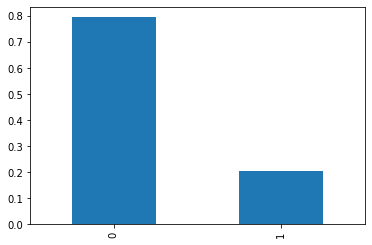

In [20]:
target_train.value_counts(normalize=True).plot(kind='bar')

* Podemos ver que o número de classes de clientes que não sairam (0) é maior. 

####        Regressão tipo DecisionTreeClassifier

In [21]:
best_model = None
best_result = 0
for depth in range(1, 6):
	model_tree = DecisionTreeClassifier(random_state=12345, max_depth= depth ) 
	model_tree.fit(features_train, target_train) 
	predictions = model_tree.predict(features_valid)
	result = accuracy_score(target_valid,predictions) 
	if result > best_result:
		best_model = features_train
		best_result = result
		f1_scr= f1_score(target_valid, predictions)
        
print("max_depth =", depth, ": ", end='')
print("Valid:", model_tree.score(features_train, target_train))
print("Train:", model_tree.score(features_valid, target_valid))
print("Acurácia do melhor modelo:", best_result)
print("Acurácia de F1:",  f1_scr)


max_depth = 5 : Valid: 0.858125
Train: 0.858125
Acurácia do melhor modelo: 0.858125
Acurácia de F1: 0.5642994241842609


  * A acurácia dos 2 conjuntos são parecidas, porém os resultados não tão satisfatórios.

Text(0.5, 15.0, 'Predicted label')

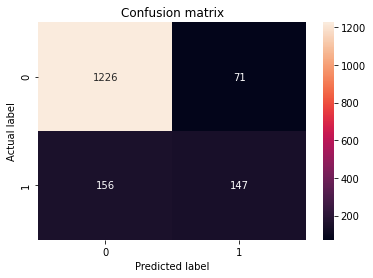

In [22]:
cnfs_mtx_DTC= confusion_matrix(target_valid, predictions)
sns.heatmap(cnfs_mtx_DTC, annot=True, fmt="g")
plt.title("Confusion matrix")
plt.ylabel("Actual label")
plt.xlabel("Predicted label")

- A matriz de confusão nos mostra que existe um certo desequilibrio de classes, ja que o número de FN E FP é alto, 156 e 71 respectivamente.

#### Modelo RandomForestClassifier

In [23]:
model_rfc = RandomForestClassifier(random_state=54321, n_estimators=9)

In [24]:
model_rfc.fit(features_train, target_train)

RandomForestClassifier(n_estimators=9, random_state=54321)

In [25]:
best_score = 0
best_est = 0
for est in range(1, 11): 
    model_rfc = RandomForestClassifier(random_state=54321, n_estimators=est) 
    model_rfc.fit(features_train, target_train ) 
    score = model_rfc.score(features_valid, target_valid)
    predictions = model_rfc.predict(features_valid)
    f1_scr_rf= f1_score(target_valid, predictions)
    if score > best_score:
        best_score = score 
        best_est = est 
print("Train:", model_rfc.score(features_train, target_train))
print("Valid:", model_rfc.score(features_valid, target_valid))
print("Acurácia do melhor modelo no conjunto de validação (n_estimators = {}): {}".format(best_est, best_score))
print("Acurácia de F1:",  f1_scr_rf)
    

Train: 0.984375
Valid: 0.85875
Acurácia do melhor modelo no conjunto de validação (n_estimators = 10): 0.85875
Acurácia de F1: 0.5330578512396693


####        regressão tipo Logistic regression

In [26]:
model_lr = LogisticRegression(random_state=12345) 
model_lr.fit(features_train, target_train) 

LogisticRegression(random_state=12345)

In [27]:
pred_lr = model_lr.predict(features_valid)
acc_lr= accuracy_score(target_valid, pred_lr)

In [28]:
tra_pred_lr = model_lr.predict(features_train)
trn_acc_lr= accuracy_score(target_train, tra_pred_lr)

In [29]:
('Acurácia' )
print('Сonjunto de treinamento:', trn_acc_lr )
print('Conjunto de validação:',  acc_lr)


Сonjunto de treinamento: 0.813125
Conjunto de validação: 0.816875


In [30]:
result = mean_squared_error(target_valid, pred_lr)**0.5 
print("O REQM do modelo de regressão linear no conjunto de validação:", result)

O REQM do modelo de regressão linear no conjunto de validação: 0.42793106921559226


In [31]:
f1_score(target_valid, pred_lr)

0.31058823529411766

Text(0.5, 15.0, 'Predicted label')

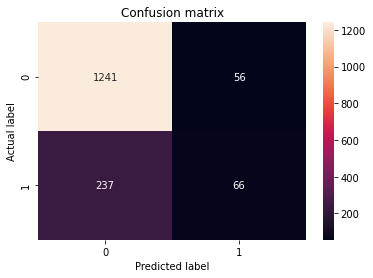

In [32]:
cnf_matrix_one = confusion_matrix(target_valid, pred_lr)

sns.heatmap(cnf_matrix_one, annot=True, fmt="g")
plt.title("Confusion matrix")
plt.ylabel("Actual label")
plt.xlabel("Predicted label")

    Observações sobre o Modelo:

 * Esse modelo foi o que teve a menor acurácia, e como ficou abaixo a nossa linha de corte (0,75), vamos descartá-lo.    
 * Esse modelo também tem um número razoável de FP E FN.

### Melhorando a qualidade do modelo

 - Utilizando o parâmetro class_weight='balanced', visando obter melhorias no modelo. 
 Com este parâmetro o algoritmo irá calcular quantas vezes a classe "0" ocorre em relação a  frequência da classe "1".

#### Melhorando o equílibrio de classes através do parâmetro class_weight='balanced' para o modelo DTC

In [33]:
model_dt_bal=DecisionTreeClassifier(random_state=12345, max_depth= depth, class_weight='balanced') 
model_dt_bal.fit(features_train, target_train) 
print("Valid:", model_dt_bal.score(features_valid, target_valid))
print("Train:", model_dt_bal.score(features_train, target_train))

Valid: 0.77
Train: 0.77328125


#### Melhorando o equílibrio de classes através do parâmetro class_weight='balanced' para o modelo RFC

In [34]:
model_rfc_bal = RandomForestClassifier(random_state=54321, n_estimators=est, class_weight='balanced') 
model_rfc_bal.fit(features_train, target_train ) 


RandomForestClassifier(class_weight='balanced', n_estimators=10,
                       random_state=54321)

In [35]:
print("Valid:", model_rfc_bal.score(features_valid, target_valid))

Valid: 0.85875


#### Melhorando o equílibrio de classes através do parâmetro class_weight='balanced' para o modelo LR

In [36]:
model_lr_bal = LogisticRegression(random_state=12345, class_weight='balanced') 
model_lr_bal.fit(features_train, target_train) 

print("Valid:", model_lr_bal.score(features_valid, target_valid))


Valid: 0.70625


##### Avaliando o resultado da melhoria de classes nos modelos

Não houve incremento significativo no score do modelo com a utilização da 'balanced' como peso de classes, em alguns casos até houve diminuição do score. 

#### Aplicando upsample e downsample

A função de upsample busca aumentar a significância de uma classe que ocorre com menor frequência. 

In [37]:
def upsample(features_train, target_train, repeat):
    features_zeros = features_train[target_train == 0]
    features_ones = features_train[target_train == 1]
    target_zeros = target_train[target_train == 0]
    target_ones = target_train[target_train == 1]

    features_upsampled = pd.concat([features_zeros] + [features_ones] * repeat)
    target_upsampled = pd.concat([target_zeros] + [target_ones] * repeat)

    features_upsampled, target_upsampled = shuffle(
        features_upsampled, target_upsampled, random_state=12345
    )
    return features_upsampled, target_upsampled

features_upsampled, target_upsampled = upsample(
    features_train, target_train, 10
)

##### Aplicando downsample no modelo


In [38]:
def downsample(features, target, fraction):
    features_zeros = features[target == 0]
    features_ones = features[target == 1]
    target_zeros = target[target == 0]
    target_ones = target[target == 1]

    features_downsampled = pd.concat(
        [features_zeros.sample(frac=fraction, random_state=12345)]
        + [features_ones]
    )
    target_downsampled = pd.concat(
        [target_zeros.sample(frac=fraction, random_state=12345)]
        + [target_ones]
    )

    features_downsampled, target_downsampled = shuffle(
        features_downsampled, target_downsampled, random_state=12345
    )

    return features_downsampled, target_downsampled

features_downsampled, target_downsampled = downsample(
    features_train, target_train, 0.1)

####  Melhorando o equílibrio de classes dos modelos  com upsample e downsample


 - *Aplicando Upsample no modelo LR* :

In [39]:
model_lr_up = LogisticRegression(random_state=12345, solver='liblinear') 
model_lr_up.fit(features_upsampled, target_upsampled)
predicted_up= model_lr_up.predict(features_upsampled) 


In [40]:
f1_score(target_upsampled, predicted_up)


0.8450902934537247

In [41]:
accuracy_score(target_upsampled, predicted_up)

0.7581897263667896

* o F1_score não teve incremento para este modelo com a otimização.

array([[ 1791,  3302],
       [ 1090, 11980]])

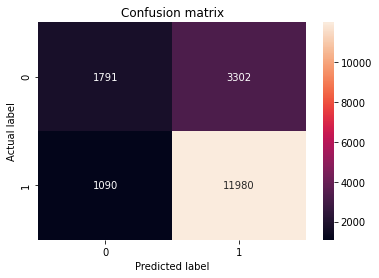

In [42]:
cnf_matrix = confusion_matrix(target_upsampled, predicted_up)

sns.heatmap(cnf_matrix, annot=True, fmt="g")
plt.title("Confusion matrix")
plt.ylabel("Actual label")
plt.xlabel("Predicted label")
cnf_matrix

 - *Aplicando upsample no modelo DTC* :

In [43]:
for depth in range(1,6):
    model_dt = DecisionTreeClassifier(random_state=12345, max_depth=depth)

model_dt.fit(features_upsampled, target_upsampled)
predicted_valid = model_dt.predict(features_valid)
probablities_valid = model_dt.predict_proba(features_valid)[:, 1]

print("max_depth =", depth)
print('  F1 =', f1_score(target_valid, predicted_valid))
print('  AUC-ROC =', roc_auc_score(target_valid, probablities_valid))
print(accuracy_score(target_valid, predicted_valid))

max_depth = 5
  F1 = 0.45537948290241875
  AUC-ROC = 0.8345203834184497
0.591875


 - *Aplicando upsample no modelo RF* :

In [44]:
for est in range(1,6):    
    model_rfc_up = RandomForestClassifier(random_state=54321, n_estimators= est) 
    model_rfc_up.fit (features_upsampled, target_upsampled)
    predicted_up_rf= model_rfc_up.predict(features_valid)
    probablities_rf_up= model_rfc_up.predict_proba(features_valid)[:, 1]

print("n_estimators =", est)
print('  F1 =', f1_score(target_valid, predicted_up_rf))
print('  AUC-ROC =', roc_auc_score(target_valid, probablities_rf_up))
print(accuracy_score(target_valid, predicted_valid))

n_estimators = 5
  F1 = 0.548494983277592
  AUC-ROC = 0.795455875579848
0.591875


 - *Aplicando downsample no modelo DTC* :

In [45]:
for est in range(1,6):    
    model_dt.fit(features_downsampled, target_downsampled)
    predic_dtc_dwn= model_dt.predict(features_valid) 
    probablities_dtc_dw= model_dt.predict_proba(features_valid)[:, 1]

print("n_estimators =", est)
print('  F1 =', f1_score(target_valid, predic_dtc_dwn))
print('  AUC-ROC =', roc_auc_score(target_valid, probablities_dtc_dw))


n_estimators = 5
  F1 = 0.4440894568690095
  AUC-ROC = 0.8211549373904237


In [46]:
accuracy_score(target_valid, predic_dtc_dwn)

0.565

 - *Aplicando downsample no modelo RFC* :

In [47]:
for est in range(1,6):    
    model_rfc_dw = LogisticRegression(random_state=12345, solver='liblinear') 
    model_rfc_dw.fit(features_downsampled, target_downsampled)
    predic_rfc_dwn= model_rfc_dw.predict(features_valid) 
    probablities_rfc_dw= model_rfc_dw.predict_proba(features_valid)[:, 1]

print("n_estimators =", est)
print('  F1 =', f1_score(target_valid, predic_rfc_dwn))
print('  AUC-ROC =', roc_auc_score(target_valid, probablities_rfc_dw))
print('score=',accuracy_score(target_valid, predic_rfc_dwn))

n_estimators = 5
  F1 = 0.3925362819626814
  AUC-ROC = 0.7644297197645746
score= 0.450625


 - *Aplicando downsample no modelo LR* :

In [48]:
model_lr_dwn = LogisticRegression(random_state=12345, solver='liblinear') 
model_lr_dwn.fit(features_downsampled, target_downsampled)
predicted_dwn= model_lr_dwn.predict(features_valid) 
probablities_lr_dw= model_lr_dwn.predict_proba(features_valid)[:, 1]
print('  F1 =', f1_score(target_valid, predicted_dwn))
print('  AUC-ROC =', roc_auc_score(target_valid, probablities_lr_dw))
print('  score =', accuracy_score(target_valid, predicted_dwn))


  F1 = 0.3925362819626814
  AUC-ROC = 0.7644297197645746
  score = 0.450625


##### Considerações sobre a performance dos modelos com downsample e upsample:


Em termos gerais os modelos com upsample tiveram um performance superior aos com downsample.
Cabe resaltar porém, que o incremento no score de upsample foi muito pequeno. 

#### Visualizando a performance dos modelos com a curva AUC-ROC:


Afim de descobrir o quanto nosso modelo difere do modelo aleatório, vamos utilizar a curva AUC-ROC que traz os valores de Taxa de positivos falsos (RPF) ao longo do eixo horizontal e os valores de Taxa de positivos verdadeiros (RPV) ao longo do eixo vertical. 

#### Modelo LR

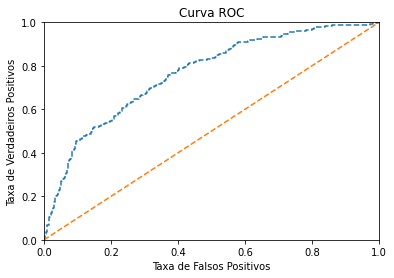

In [49]:
probabilities_valid_lr = model_lr.predict_proba(features_valid)
probabilities_one_valid = probabilities_valid_lr[:, 1]

fpr, tpr, thresholds = roc_curve(target_valid, probabilities_one_valid)  # < escreva o código aqui >

plt.figure()

plt.plot(fpr, tpr, [0, 5], [0, 5], linestyle='--')

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('Taxa de Falsos Positivos')
plt.ylabel('Taxa de Verdadeiros Positivos')
plt.title('Curva ROC')
plt.show() 
plt.show()

In [50]:
auc_roc = roc_auc_score(target_valid, probabilities_one_valid )
auc_roc

0.7632337636230855

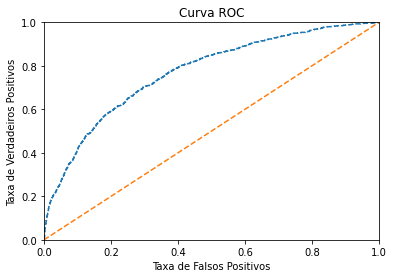

In [51]:
probabilities_up = model_lr.predict_proba(features_upsampled)
probabilities_one_up = probabilities_up[:, 1]

fpr, tpr, thresholds = roc_curve(target_upsampled, probabilities_one_up)  # < escreva o código aqui >

plt.figure()

plt.plot(fpr, tpr, [0, 5], [0, 5], linestyle='--')

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('Taxa de Falsos Positivos')
plt.ylabel('Taxa de Verdadeiros Positivos')
plt.title('Curva ROC')
plt.show() 
plt.show()

In [52]:
roc_auc_score(target_upsampled, probabilities_one_up )


0.7694340507569161

#### Modelo DTC

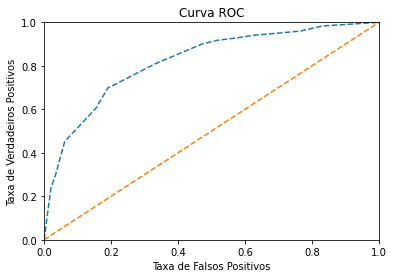

In [53]:
predicted_valid = model_dt.predict_proba(features_valid)
probablities_valid_dt = predicted_valid[:, 1]

fpr, tpr, thresholds = roc_curve(target_valid, probablities_valid_dt)  # < escreva o código aqui >

plt.figure()

plt.plot(fpr, tpr, [0, 5], [0, 5], linestyle='--')

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('Taxa de Falsos Positivos')
plt.ylabel('Taxa de Verdadeiros Positivos')
plt.title('Curva ROC')
plt.show() 
plt.show()

In [54]:
auc_roc = roc_auc_score(target_valid, probablities_valid_dt )
auc_roc

0.8211549373904237

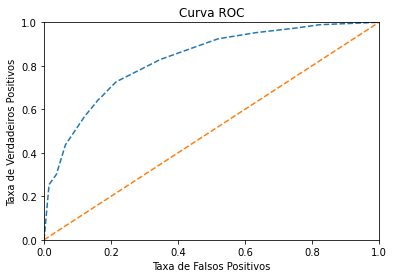

In [55]:
predicted_valid_up = model_dt.predict_proba(features_upsampled)
probablities_valid_up = predicted_valid_up[:, 1]

fpr, tpr, thresholds = roc_curve(target_upsampled, probablities_valid_up)  # < escreva o código aqui >

plt.figure()

plt.plot(fpr, tpr, [0, 5], [0, 5], linestyle='--')

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('Taxa de Falsos Positivos')
plt.ylabel('Taxa de Verdadeiros Positivos')
plt.title('Curva ROC')
plt.show() 
plt.show()

In [56]:
roc_auc_score(target_upsampled, probablities_valid_up )


0.8286080133690855

#### Modelo RF

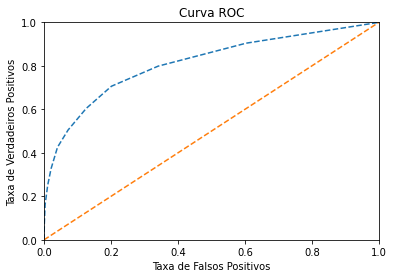

In [57]:
predicted_valid_rf = model_rfc.predict_proba(features_valid)
probablities_valid_rf = predicted_valid_rf[:, 1]

fpr, tpr, thresholds = roc_curve(target_valid, probablities_valid_rf)  # < escreva o código aqui >

plt.figure()

plt.plot(fpr, tpr, [0, 5], [0, 5], linestyle='--')

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('Taxa de Falsos Positivos')
plt.ylabel('Taxa de Verdadeiros Positivos')
plt.title('Curva ROC')
plt.show() 
plt.show()

In [58]:
roc_auc_score(target_valid, probablities_valid_rf )


0.8123824718632233

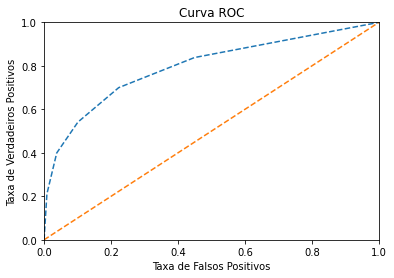

In [59]:
predicted_up_rf = model_rfc_up.predict_proba(features_valid)
probablities_up_rf = predicted_up_rf[:, 1]

fpr, tpr, thresholds = roc_curve(target_valid, probablities_up_rf)  # < escreva o código aqui >

plt.figure()

plt.plot(fpr, tpr, [0, 5], [0, 5], linestyle='--')

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('Taxa de Falsos Positivos')
plt.ylabel('Taxa de Verdadeiros Positivos')
plt.title('Curva ROC')
plt.show() 
plt.show()

In [60]:
roc_auc_score(target_valid, probablities_up_rf )


0.795455875579848

##### Resultados

- Os modelos DTC e LR tiveram um ligeiro incremento no roc_auc_score com o upsample. 
- O que teve a melhor performançe foi DTC. 

## Teste final para validação do melhor modelo



O mehor modelo foi o DT, que obteve o score de 0.858 com os paramêtros de max_depth= 5 . As demais métricas (AUC-ROC, f1-score...) também tiveram valores acima dos demais modelos. 

In [61]:
model_tree_fin = DecisionTreeClassifier(random_state=12345, max_depth= 5 ) 
model_tree_fin.fit(features_test, target_test) 
predictions_tst = model_tree.predict(features_valid)
f1_scr= f1_score(target_valid, predictions_tst)

print("Test:", model_tree_fin.score(features_test, target_test))
print("Acurácia de F1:",  f1_scr)


Test: 0.8595
Acurácia de F1: 0.5642994241842609


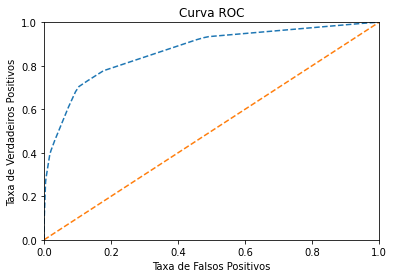

In [62]:
predicted_fin = model_tree_fin.predict_proba(features_test)
probablities_fin = predicted_fin[:, 1]

fpr, tpr, thresholds = roc_curve(target_test, probablities_fin)  # < escreva o código aqui >

plt.figure()

plt.plot(fpr, tpr, [0, 5], [0, 5], linestyle='--')

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('Taxa de Falsos Positivos')
plt.ylabel('Taxa de Verdadeiros Positivos')
plt.title('Curva ROC')
plt.show() 
plt.show()

In [63]:
roc_auc_score(target_test, probablities_fin )


0.8698931470913587

Conforme esperado o resultado do score foi satisfatório, sendo assim este é o melhor modelo para prever o nosso objetivo que é prever a probabilidade de um cliente deixar o banco. 